In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib import rnn 
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [15]:
tf.reset_default_graph()

hm_epochs = 50
n_classes = 10
batch_size = 128

chunk_size = 28
n_chunks = 28

rnn_size = 128

x = tf.placeholder('float',[None,n_chunks,chunk_size])
y = tf.placeholder('float')


def rnn_model(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size, n_classes])),
             'biases' :tf.Variable(tf.random_normal([n_classes]))}
    
    x = tf.transpose(x, [1,0,2])
    x = tf.reshape(x, [-1, chunk_size])
    x = tf.split(x,n_chunks,0)
    
    lstm_cell = rnn.BasicLSTMCell(rnn_size) 
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
    
    output = tf.add( tf.matmul(outputs[-1], layer['weights']) , layer['biases'])
    
    return output


def rnn_train(x):
    prediction = rnn_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    ep_loss = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0;
            for _ in range( int(mnist.train.num_examples/batch_size) ):
                epoch_x, epoch_y = mnist.train.next_batch( batch_size )
                epoch_x = epoch_x.reshape((batch_size, n_chunks,chunk_size))
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
                epoch_loss += c
            ep_loss .append(epoch_loss)
            print('Epoch: ', epoch, ' completed out of: ', hm_epochs, ' loss: ', epoch_loss)
            
            
        ## Check how good model is
        correct = tf.equal (tf.argmax(prediction,1), tf.argmax(y,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        print('Accuracy: ',accuracy.eval({x:mnist.test.images.reshape((-1, n_chunks, chunk_size)), y:mnist.test.labels}))
        plt.plot(ep_loss)

Epoch:  0  completed out of:  50  loss:  194.554999776
Epoch:  1  completed out of:  50  loss:  56.1549380012
Epoch:  2  completed out of:  50  loss:  39.2864133501
Epoch:  3  completed out of:  50  loss:  30.3782144524
Epoch:  4  completed out of:  50  loss:  24.1369350129
Epoch:  5  completed out of:  50  loss:  20.5185409174
Epoch:  6  completed out of:  50  loss:  17.0410661108
Epoch:  7  completed out of:  50  loss:  16.0505791996
Epoch:  8  completed out of:  50  loss:  13.3276822991
Epoch:  9  completed out of:  50  loss:  11.9920238373
Epoch:  10  completed out of:  50  loss:  10.9898613783
Epoch:  11  completed out of:  50  loss:  9.14972923696
Epoch:  12  completed out of:  50  loss:  9.50527428539
Epoch:  13  completed out of:  50  loss:  9.20446793029
Epoch:  14  completed out of:  50  loss:  6.94771047933
Epoch:  15  completed out of:  50  loss:  6.70474715548
Epoch:  16  completed out of:  50  loss:  6.26526452746
Epoch:  17  completed out of:  50  loss:  6.49223195188
Ep

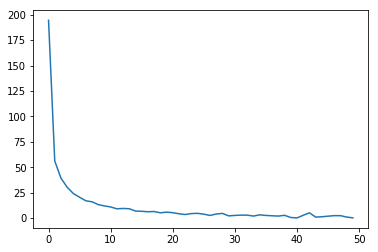

In [16]:
rnn_train(x)